# polynomial Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Position_Salaries.csv")

In [3]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
data.shape

(10, 3)

# step 1 : seperate data set into dependent and independed variable

In [9]:
x = data.iloc[:,1:2].values
y = data.iloc[:,2].values

In [12]:
x  # independent variables 

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [13]:
y # dependent variables which contain the salaries of the employes 

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

# step 2 :  Fitting Linear Regeression model to the data set

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# step 3 : Fitting Polynomial Regression to the dataset

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x)

In [36]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [38]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# step 4 : Visualising the Linear Regression Results 

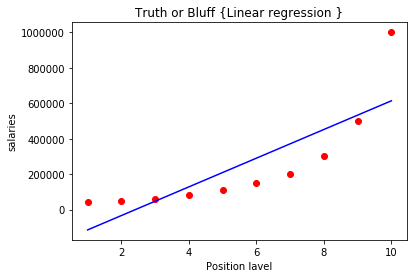

In [58]:
plt.scatter(x,y,color = 'red')
plt.plot(x,lin_reg.predict(x),color = 'blue')
plt.title('Truth or Bluff {Linear regression }')
plt.xlabel("Position lavel")
plt.ylabel("salaries")
plt.show()

# step 5 : Visualising the Polynomial Regression Results

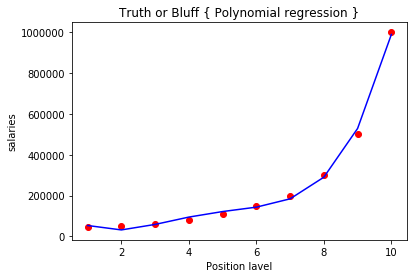

In [64]:
plt.scatter(x,y,color = 'red')
plt.plot(x,lin_reg2.predict(poly_reg.fit_transform(x)),color = 'blue')
plt.title('Truth or Bluff { Polynomial regression }')
plt.xlabel("Position lavel")
plt.ylabel("salaries")
plt.show()

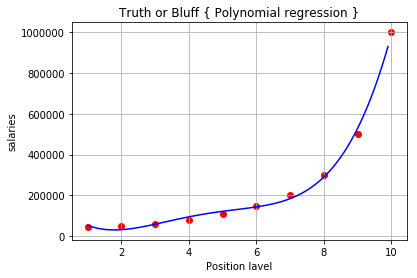

In [67]:
X_grid = np.arange(min(x),max(x),0.1)
X_grid = X_grid.reshape((len(X_grid),1)) 
plt.scatter(x,y,color = 'red')
plt.plot(X_grid,lin_reg2.predict( poly_reg.fit_transform(X_grid)),color = 'blue')
plt.title('Truth or Bluff { Polynomial regression }')
plt.xlabel("Position lavel")
plt.grid()
plt.ylabel("salaries")
plt.show()

# step 6 : predicting a new result with Linear Regression model

In [70]:
lin_reg.predict(x)
#lin_reg.predict(6.5)

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

# step 7 : predicting a new result with Polynomial Regression

In [71]:
lin_reg2.predict( poly_reg.fit_transform(x))
#lin_reg2.predict( poly_reg.fit_transform(6.5))

array([ 53356.64335681,  31759.90675996,  58642.19114221,  94632.86713289,
       121724.94172498, 143275.05827508, 184003.49650349, 289994.17249411,
       528694.63869452, 988916.08391594])